In [ ]:
########################################################## CategoricalHingeLoss  #################################################################################################################################

In [ ]:
pip install flair torch

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 388.3/388.3 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.3/139.3 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.4/54.4 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.7/19.7 MB 32.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 42.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 202.6/202.6 kB 16.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.8/143.8 kB 9.9 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.

In [ ]:
%pip install datasets
%pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.0/542.0 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 18.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 13.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 388.9/388.9 kB 32.6 MB/s eta 0:00:00
  Attempting uninstall: huggingface-hub
    Found existing installation: huggingface-hub 0.20.3
    Uninstalling huggingface-hub-0.20.3:
      Successfully uninstalled huggingface-hub-0.20.3


In [ ]:
from flair.embeddings import TransformerWordEmbeddings, FlairEmbeddings, StackedEmbeddings
from flair.data import Sentence
import torch
from torch.nn.utils.rnn import pad_sequence
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
import torch.optim as optim
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from datasets import load_dataset,load_metric

In [ ]:
from datasets import load_dataset,load_metric
dataset=load_dataset("surrey-nlp/PLOD-CW")
print(type(dataset))

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Generating train split:   0%|          | 0/1072 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/126 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/153 [00:00<?, ? examples/s]

<class 'datasets.dataset_dict.DatasetDict'>


In [ ]:
a=dataset['train']['tokens']
X_train = [' '.join(sublist) for sublist in a]

print(X_train)

['For this purpose the Gothenburg Young Persons Empowerment Scale ( GYPES ) was developed .', 'The following physiological traits were measured : stomatal conductance ( gs , mol H2O m-2 s-1 ) , transpiration rate ( E , mmol H2O m-2 s-1 ) , net photosynthetic rate ( PN , μmol m-2 s-1 ) and intercellular CO2 concentration CO2 ( Ci , μmol m-2 s-1 ) .', 'Minor H antigen alloimmune responses readily occur in the setting of human leukocyte antigen ( HLA)–matched allogeneic solid organ and stem cell transplantation ( SCT ) [ 3,4 ] .', 'EPI = Echo planar imaging .', 'Furthermore , eNOS - derived NO S - nitrosylated β - actin on Cys374 and impaired actin binding to profilin-1 ( PFN1 ) , as confirmed with the transnitrosylating agent S - nitroso - L - cysteine ( Cys-NO ) .', 'The importance of NO and the formation of PFN1 - actin complexes on the regulation of PKC was corroborated by overexpression of -θPFN1- and actin - binding defective mutants of β - actin ( C374S ) and PFN1 ( H119E ) , respe

In [ ]:
b=dataset['test']['tokens']
X_test = [' '.join(sublist) for sublist in b]

print(X_test)

['Abbreviations : GEMS , Global Enteric Multicenter Study ; VIP , ventilated improved pit .', 'Fractions from FPLC purification were treated with Laemmli buffer [ 82 ] with 10 mM 1,4 - dithiothreitol ( DTT ) and heated for 5 m at 85 ° C then analyzed on a 4 % to 15 % discontinuous SDS gel with a 6 % stacking gel run at ambient temperature at a constant 100 V. Two epithelial cytokines other than IL33 , IL25 , and thymic stromal lymphopoietin ( TSLP ) are known to activate ILC2 in the lung [ 22,24 ] .', 'We developed a variant of gene set enrichment analysis ( GSEA ) to determine whether a genetic pathway shows evidence for age regulation [ 23 ] .', 'Red represents samples having the normalized pY232 and/or pY291 values in cancer tissues ≥ 1.1 folds of normal tissues ( of which enhanced pY232 and/or pY291 level may be indicative of dominant survival mode of Fas signaling ) ; blue represents samples having both normalized pY232 and pY291 values < 1.1 ( of which pY232 and pY291 levels less

In [ ]:
c=dataset['validation']['tokens']
X_validation = [' '.join(sublist) for sublist in c]

print(X_validation)

['= Manual Ability Classification System ; QUEST = Quest - Quality of upper extremity skills test ; Cont = control ; M = male , F = female , V = verbal , nonV = non - Verbal , |Quad = quadriplegia , Di = Diplegia , Hemi = hemiplegia .', 'Electro - oculography ( EOG ) ( RetiPort32 , Roland Consult , Wiesbaden , Germany ) was performed in all patients according to the guidelines of the International Society for Clinical Electrophysiology of Vision ( ISCEV).[12 ] Arden ratios below 1.8 were rated as pathologic .', 'Soluble N - ethylmaleimide - sensitive factor attachment protein receptor ( SNARE ) proteins , including target- ( t- ) membrane SNAREs ( Syntaxins [ Syn ] ) and synaptosomal - associated proteins of 25 kDa ( SNAP25 ) and vesicle - associated membrane proteins ( VAMPs ) , are the fundamental components of the exocytotic machinery required for the docking and fusion of secretory granules ( SGs ) with the plasma membrane ( PM ) , which have been well studied in neurons [ 1 , 2 ] 

In [ ]:
from sklearn.preprocessing import MultiLabelBinarizer

# Extract the ner_tags column from your training data
train_labels = dataset['train']['ner_tags']
test_labels=dataset['test']['ner_tags']
val_labels=dataset['validation']['ner_tags']

# Create an instance of MultiLabelBinarizer
mlb = MultiLabelBinarizer()

# Fit and transform the list of lists of labels
y_train= mlb.fit_transform(train_labels)
y_test= mlb.transform(test_labels)
y_vals= mlb.transform(val_labels)

# Assuming mlb is your MultiLabelBinarizer instance
print("Classes encoded by MultiLabelBinarizer:", mlb.classes_)
print("Frequency of each class in training set:", y_train.sum(axis=0))
print("Frequency of each class in test set:", y_test.sum(axis=0))
print("Frequency of each class in test set:", y_vals.sum(axis=0))

print(y_train.shape)
print(y_test.shape)
print(y_vals.shape)

Classes encoded by MultiLabelBinarizer: ['B-AC' 'B-LF' 'B-O' 'I-LF']
Frequency of each class in training set: [ 958  856 1072  802]
Frequency of each class in test set: [131 113 153 100]
Frequency of each class in test set: [116 101 126  90]
(1072, 4)
(153, 4)
(126, 4)


In [ ]:

bert_embeddings = TransformerWordEmbeddings('bert-base-uncased')

# Initialize Flair embeddings (forward and backward)
flair_forward = FlairEmbeddings('news-forward-fast')
flair_backward = FlairEmbeddings('news-backward-fast')

# Stack embeddings
stacked_embeddings = StackedEmbeddings([
    bert_embeddings,
    flair_forward,
    flair_backward
])

In [ ]:
import torch

In [ ]:
def embed_documents(documents):
    embedded_docs = []
    for doc in documents:
        sentence = Sentence(doc)
        stacked_embeddings.embed(sentence)
        # Collecting embedded vectors
        embedded_docs.append(torch.stack([token.embedding for token in sentence]))
    return embedded_docs


train_embedded = embed_documents(X_train)
test_embedded = embed_documents(X_test)
val_embedded=embed_documents(X_validation)

# Pad sequences for uniform input size
train_padded = pad_sequence(train_embedded, batch_first=True)
test_padded = pad_sequence(test_embedded, batch_first=True)
val_padded=pad_sequence(val_embedded, batch_first=True)

In [ ]:
import torch.nn as nn
 # Define the BiLSTM model
class BiLSTM(nn.Module):
    def __init__(self, embedding_dim, hidden_dim, output_dim):
        super(BiLSTM, self).__init__()
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, bidirectional=True, batch_first=True)
        self.fc = nn.Linear(2 * hidden_dim, output_dim)

    def forward(self, x):
        lstm_out, _ = self.lstm(x)
        out = self.fc(lstm_out)
        return out


In [ ]:
import torch
import torch.nn as nn

class CategoricalHingeLoss(nn.Module):
    def __init__(self):
        super(CategoricalHingeLoss, self).__init__()

    def forward(self, inputs, targets):
        # Inputs shape: [batch_size, num_classes]
        # Targets shape: [batch_size]

        # Get the scores for the correct classes
        correct_scores = inputs.gather(1, targets.unsqueeze(1)).squeeze(1)

        # Create a mask to zero out the correct class scores
        mask = torch.ones_like(inputs).scatter_(1, targets.unsqueeze(1), 0.0)

        # Apply the mask and subtract a large number to ensure correct class scores are not considered as maximum
        max_losers = torch.max(inputs - (1e7 * (1 - mask)), dim=1)[0]

        # Calculate hinge loss
        loss = torch.clamp(1.0 + max_losers - correct_scores, min=0)
        return loss.mean()

# Example use case with dummy data:
inputs = torch.randn(10, 4)  # batch size of 10, num_classes of 4
targets = torch.randint(0, 4, (10,))
loss_function = CategoricalHingeLoss()
loss = loss_function(inputs, targets)
print("Calculated Loss:", loss.item())



Calculated Loss: 2.002352237701416


In [ ]:
from torch.utils.data import DataLoader, TensorDataset
import torch.optim as optim


# Define the model, optimizer, and loss function
model = BiLSTM(embedding_dim=3072, hidden_dim=256, output_dim=len(mlb.classes_))
criterion = CategoricalHingeLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Dataloaders
train_data = TensorDataset(train_padded, torch.tensor(y_train, dtype=torch.long))
test_data = TensorDataset(test_padded, torch.tensor(y_test, dtype=torch.long))
val_data = TensorDataset(val_padded, torch.tensor(y_vals, dtype=torch.long))

train_loader = DataLoader(train_data, batch_size=32, shuffle=True)
test_loader = DataLoader(test_data, batch_size=32, shuffle=False)
val_loader=DataLoader(val_data, batch_size=32, shuffle=False)



In [ ]:


# Training loop
for epoch in range(3):  # or more epochs
    model.train()
    total_loss = 0
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    print(f'Epoch {epoch+1}: Loss = {total_loss / len(train_loader)}')


Epoch 1: Loss = 0.6015173687654383
Epoch 2: Loss = 0.2640966737971586
Epoch 3: Loss = 0.18748979423852527


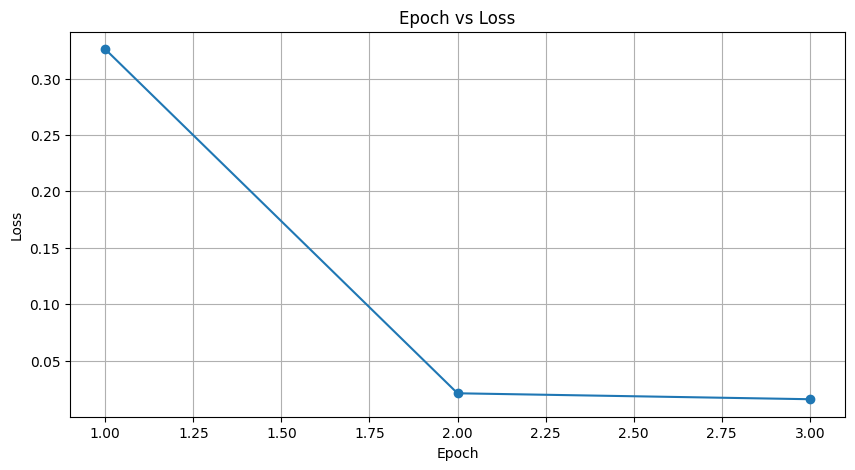

In [ ]:
# Plotting the epoch vs loss graph
plt.figure(figsize=(10, 5))
plt.plot(range(1, 4), epoch_losses, marker='o', linestyle='-')
plt.title('Epoch vs Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.show()
# Evaluation block
all_preds = []
all_true = []

In [ ]:
# Evaluation block
all_preds = []
all_true = []

model.eval()
with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = model(inputs)
        preds = torch.argmax(outputs, dim=1)
        all_preds.extend(preds.cpu().numpy())
        all_true.extend(labels.cpu().numpy())

# Calculate and print metrics
accuracy = accuracy_score(all_true, all_preds)
precision = precision_score(all_true, all_preds, average='macro')
recall = recall_score(all_true, all_preds, average='macro')
f1 = f1_score(all_true, all_preds, average='macro')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(classification_report(all_true, all_preds, target_names=mlb.classes_))

Accuracy: 0.6993
Precision: 0.8713
Recall: 0.9809
F1 Score: 0.9210
              precision    recall  f1-score   support

        B-AC       0.91      0.99      0.95       131
        B-LF       0.84      0.99      0.91       113
         B-O       1.00      1.00      1.00       153
        I-LF       0.74      0.94      0.83       100

   micro avg       0.88      0.98      0.93       497
   macro avg       0.87      0.98      0.92       497
weighted avg       0.89      0.98      0.93       497
 samples avg       0.88      0.99      0.91       497



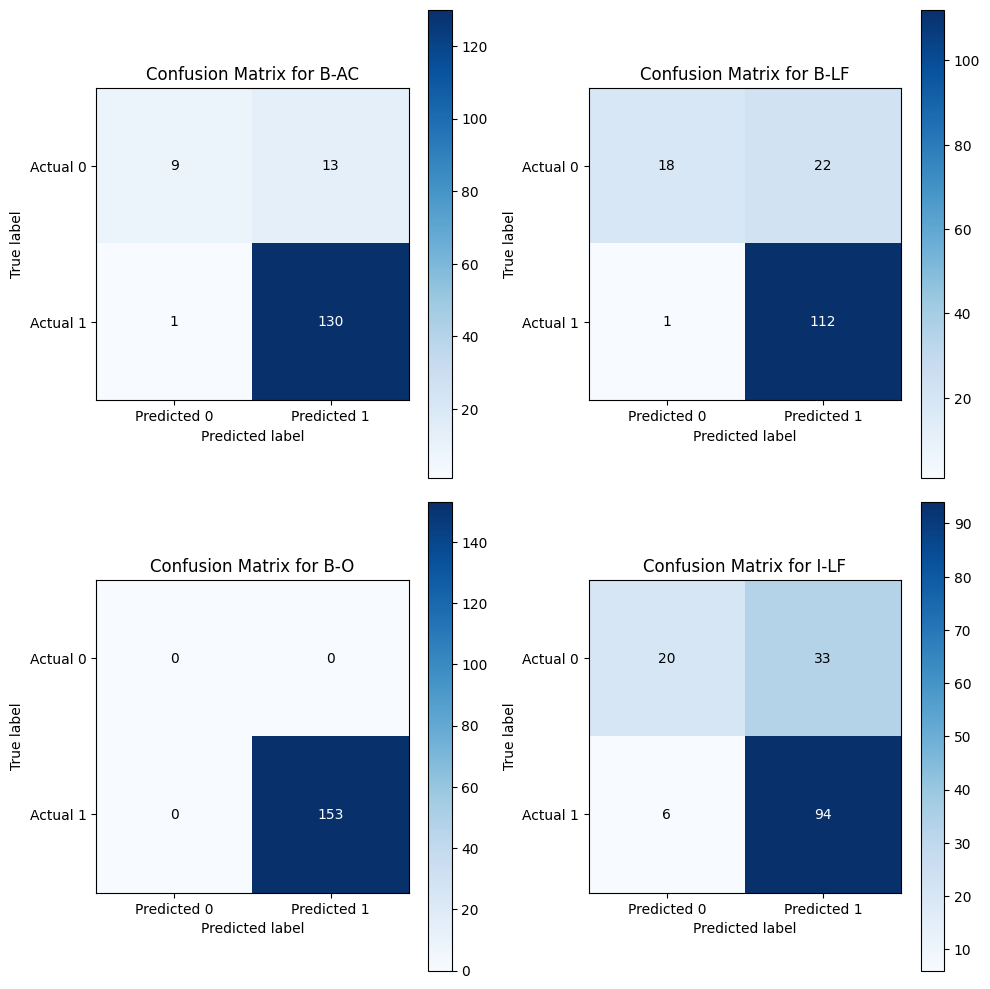

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import multilabel_confusion_matrix
import numpy as np



conf_matrices = multilabel_confusion_matrix(all_true, all_preds)

def plot_confusion_matrices(confusion_matrices, classes):
    fig, axes = plt.subplots(nrows=int(len(classes) / 2), ncols=2, figsize=(10, 5 * int(len(classes) / 2)))
    axes = axes.flatten()  # Flatten if you have more than two subplots

    for i, matrix in enumerate(confusion_matrices):
        ax = axes[i]
        im = ax.imshow(matrix, interpolation='nearest', cmap=plt.cm.Blues)
        ax.figure.colorbar(im, ax=ax)
        ax.set(xticks=np.arange(matrix.shape[1]),
               yticks=np.arange(matrix.shape[0]),
               xticklabels=['Predicted 0', 'Predicted 1'],
               yticklabels=['Actual 0', 'Actual 1'],
               title=f'Confusion Matrix for {classes[i]}',
               ylabel='True label',
               xlabel='Predicted label')

        # Loop over data dimensions and create text annotations.
        thresh = matrix.max() / 2.
        for x in range(matrix.shape[0]):
            for y in range(matrix.shape[1]):
                ax.text(y, x, format(matrix[x, y], 'd'),
                        ha="center", va="center",
                        color="white" if matrix[x, y] > thresh else "black")

    fig.tight_layout()
    plt.show()

plot_confusion_matrices(conf_matrices, mlb.classes_)


In [ ]:
def evaluate_model(loader):
    model.eval()
    all_preds = []
    all_true = []
    with torch.no_grad():
        for inputs, labels in loader:
            outputs = model(inputs)
            preds = torch.argmax(outputs, dim=1)
            all_preds.extend(preds.cpu().numpy())
            all_true.extend(labels.cpu().numpy())
    return all_true, all_preds

# Evaluate on test and validation datasets
test_true, test_preds = evaluate_model(test_loader)
val_true, val_preds = evaluate_model(val_loader)

# Calculate performance metrics
test_accuracy = accuracy_score(test_true, test_preds)
val_accuracy = accuracy_score(val_true, val_preds)
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Validation Accuracy: {val_accuracy:.4f}")

Test Accuracy: 0.6993
Validation Accuracy: 0.7143


In [ ]:
import torch
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Determine if CUDA is available and set the device accordingly
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)  # Move the model to the appropriate device

def evaluate(model, data_loader, device):
    model.eval()  # Set the model to evaluation mode
    all_preds = []
    all_true = []
    with torch.no_grad():  # Turn off gradients to speed up this part
        for inputs, labels in data_loader:
            inputs, labels = inputs.to(device), labels.to(device)  # Ensure data and labels are on the right device
            outputs = model(inputs)
            preds = torch.argmax(outputs, dim=1)
            all_preds.extend(preds.cpu().numpy())  # Move predictions to CPU
            all_true.extend(labels.cpu().numpy())  # Move labels to CPU
    return all_true, all_preds

def print_metrics(true, preds, description):
    accuracy = accuracy_score(true, preds)
    precision = precision_score(true, preds, average='macro', zero_division=0)
    recall = recall_score(true, preds, average='macro', zero_division=0)
    f1 = f1_score(true, preds, average='macro', zero_division=0)
    print(f"{description} - Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}")
    print(classification_report(true, preds, target_names=mlb.classes_))

# Evaluate on test data
test_true, test_preds = evaluate(model, test_loader, device)
print_metrics(test_true, test_preds, "Test Data")

# Evaluate on validation data
val_true, val_preds = evaluate(model, val_loader, device)
print_metrics(val_true, val_preds, "Validation Data")


Test Data - Accuracy: 0.6993, Precision: 0.8713, Recall: 0.9809, F1 Score: 0.9210
              precision    recall  f1-score   support

        B-AC       0.91      0.99      0.95       131
        B-LF       0.84      0.99      0.91       113
         B-O       1.00      1.00      1.00       153
        I-LF       0.74      0.94      0.83       100

   micro avg       0.88      0.98      0.93       497
   macro avg       0.87      0.98      0.92       497
weighted avg       0.89      0.98      0.93       497
 samples avg       0.88      0.99      0.91       497

Validation Data - Accuracy: 0.7143, Precision: 0.8778, Recall: 0.9771, F1 Score: 0.9230
              precision    recall  f1-score   support

        B-AC       0.93      0.99      0.96       116
        B-LF       0.82      0.95      0.88       101
         B-O       1.00      1.00      1.00       126
        I-LF       0.76      0.97      0.85        90

   micro avg       0.88      0.98      0.93       433
   macro avg   

In [ ]:
############################################################################              FocalLoss           ##############################################################################

In [ ]:
%pip install datasets
%pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.0/542.0 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 12.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 19.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 13.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 388.9/388.9 kB 25.5 MB/s eta 0:00:00
  Attempting uninstall: huggingface-hub
    Found existing installation: huggingface-hub 0.20.3
    Uninstalling huggingface-hub-0.20.3:
      Successfully uninstalled huggingface-hub-0.20.3


In [ ]:
!pip install flair torch

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 388.3/388.3 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.3/139.3 kB 15.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.4/54.4 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.7/19.7 MB 76.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 62.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 202.6/202.6 kB 22.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.8/143.8 kB 16.6 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.

In [ ]:
from flair.embeddings import TransformerWordEmbeddings, FlairEmbeddings, StackedEmbeddings
from flair.data import Sentence
import torch
from torch.nn.utils.rnn import pad_sequence
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
import torch.optim as optim
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from datasets import load_dataset,load_metric

In [ ]:
from datasets import load_dataset,load_metric
dataset=load_dataset("surrey-nlp/PLOD-CW")
print(type(dataset))

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Generating train split:   0%|          | 0/1072 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/126 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/153 [00:00<?, ? examples/s]

<class 'datasets.dataset_dict.DatasetDict'>


In [ ]:
a=dataset['train']['tokens']
X_train = [' '.join(sublist) for sublist in a]

print(X_train)

['For this purpose the Gothenburg Young Persons Empowerment Scale ( GYPES ) was developed .', 'The following physiological traits were measured : stomatal conductance ( gs , mol H2O m-2 s-1 ) , transpiration rate ( E , mmol H2O m-2 s-1 ) , net photosynthetic rate ( PN , μmol m-2 s-1 ) and intercellular CO2 concentration CO2 ( Ci , μmol m-2 s-1 ) .', 'Minor H antigen alloimmune responses readily occur in the setting of human leukocyte antigen ( HLA)–matched allogeneic solid organ and stem cell transplantation ( SCT ) [ 3,4 ] .', 'EPI = Echo planar imaging .', 'Furthermore , eNOS - derived NO S - nitrosylated β - actin on Cys374 and impaired actin binding to profilin-1 ( PFN1 ) , as confirmed with the transnitrosylating agent S - nitroso - L - cysteine ( Cys-NO ) .', 'The importance of NO and the formation of PFN1 - actin complexes on the regulation of PKC was corroborated by overexpression of -θPFN1- and actin - binding defective mutants of β - actin ( C374S ) and PFN1 ( H119E ) , respe

In [ ]:
b=dataset['test']['tokens']
X_test = [' '.join(sublist) for sublist in b]

print(X_test)

['Abbreviations : GEMS , Global Enteric Multicenter Study ; VIP , ventilated improved pit .', 'Fractions from FPLC purification were treated with Laemmli buffer [ 82 ] with 10 mM 1,4 - dithiothreitol ( DTT ) and heated for 5 m at 85 ° C then analyzed on a 4 % to 15 % discontinuous SDS gel with a 6 % stacking gel run at ambient temperature at a constant 100 V. Two epithelial cytokines other than IL33 , IL25 , and thymic stromal lymphopoietin ( TSLP ) are known to activate ILC2 in the lung [ 22,24 ] .', 'We developed a variant of gene set enrichment analysis ( GSEA ) to determine whether a genetic pathway shows evidence for age regulation [ 23 ] .', 'Red represents samples having the normalized pY232 and/or pY291 values in cancer tissues ≥ 1.1 folds of normal tissues ( of which enhanced pY232 and/or pY291 level may be indicative of dominant survival mode of Fas signaling ) ; blue represents samples having both normalized pY232 and pY291 values < 1.1 ( of which pY232 and pY291 levels less

In [ ]:
c=dataset['validation']['tokens']
X_validation = [' '.join(sublist) for sublist in c]

print(X_validation)

['= Manual Ability Classification System ; QUEST = Quest - Quality of upper extremity skills test ; Cont = control ; M = male , F = female , V = verbal , nonV = non - Verbal , |Quad = quadriplegia , Di = Diplegia , Hemi = hemiplegia .', 'Electro - oculography ( EOG ) ( RetiPort32 , Roland Consult , Wiesbaden , Germany ) was performed in all patients according to the guidelines of the International Society for Clinical Electrophysiology of Vision ( ISCEV).[12 ] Arden ratios below 1.8 were rated as pathologic .', 'Soluble N - ethylmaleimide - sensitive factor attachment protein receptor ( SNARE ) proteins , including target- ( t- ) membrane SNAREs ( Syntaxins [ Syn ] ) and synaptosomal - associated proteins of 25 kDa ( SNAP25 ) and vesicle - associated membrane proteins ( VAMPs ) , are the fundamental components of the exocytotic machinery required for the docking and fusion of secretory granules ( SGs ) with the plasma membrane ( PM ) , which have been well studied in neurons [ 1 , 2 ] 

In [ ]:
from sklearn.preprocessing import MultiLabelBinarizer

# Extract the ner_tags column from your training data
train_labels = dataset['train']['ner_tags']
test_labels=dataset['test']['ner_tags']
val_labels=dataset['validation']['ner_tags']

# Create an instance of MultiLabelBinarizer
mlb = MultiLabelBinarizer()

# Fit and transform the list of lists of labels
y_train= mlb.fit_transform(train_labels)
y_test= mlb.transform(test_labels)
y_vals= mlb.transform(val_labels)

In [ ]:

bert_embeddings = TransformerWordEmbeddings('bert-base-uncased')

# Initialize Flair embeddings (forward and backward)
flair_forward = FlairEmbeddings('news-forward-fast')
flair_backward = FlairEmbeddings('news-backward-fast')

# Stack embeddings
stacked_embeddings = StackedEmbeddings([
    bert_embeddings,
    flair_forward,
    flair_backward
])


In [ ]:
import torch

In [ ]:
def embed_documents(documents):
    embedded_docs = []
    for doc in documents:
        sentence = Sentence(doc)
        stacked_embeddings.embed(sentence)
        # Collecting embedded vectors
        embedded_docs.append(torch.stack([token.embedding for token in sentence]))
    return embedded_docs


train_embedded = embed_documents(X_train)
test_embedded = embed_documents(X_test)
val_embedded=embed_documents(X_validation)

# Pad sequences for uniform input size
train_padded = pad_sequence(train_embedded, batch_first=True)
test_padded = pad_sequence(test_embedded, batch_first=True)
val_padded=pad_sequence(val_embedded, batch_first=True)

In [ ]:
import torch.nn as nn
 # Define the BiLSTM model
class BiLSTM(nn.Module):
    def __init__(self, embedding_dim, hidden_dim, output_dim):
        super(BiLSTM, self).__init__()
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, bidirectional=True, batch_first=True)
        self.fc = nn.Linear(2 * hidden_dim, output_dim)

    def forward(self, x):
        lstm_out, _ = self.lstm(x)
        out = self.fc(lstm_out)
        return out

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class FocalLoss(nn.Module):
    def __init__(self, gamma=2.0, alpha=0.25, reduction='mean'):
        super(FocalLoss, self).__init__()
        self.gamma = gamma
        self.alpha = alpha
        self.reduction = reduction

    def forward(self, inputs, targets):
        # Assuming inputs are raw logits and targets are indices for the true class
        ce_loss = F.cross_entropy(inputs, targets, reduction='none')
        pt = torch.exp(-ce_loss)  # Preventing overflow
        focal_loss = self.alpha * (1 - pt) ** self.gamma * ce_loss

        if self.reduction == 'mean':
            return torch.mean(focal_loss)
        elif self.reduction == 'sum':
            return torch.sum(focal_loss)
        else:
            return focal_loss





In [ ]:
from torch.utils.data import DataLoader, TensorDataset
import torch.optim as optim


model = BiLSTM(embedding_dim=3072, hidden_dim=256, output_dim=len(mlb.classes_))

# Loss and optimizer
criterion = FocalLoss(gamma=2.0, alpha=0.25, reduction='mean')
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Dataloaders
train_data = TensorDataset(train_padded, torch.tensor(y_train, dtype=torch.long))
test_data = TensorDataset(test_padded, torch.tensor(y_test, dtype=torch.long))
val_data = TensorDataset(val_padded, torch.tensor(y_vals, dtype=torch.long))

train_loader = DataLoader(train_data, batch_size=32, shuffle=True)
test_loader = DataLoader(test_data, batch_size=32, shuffle=False)
val_loader=DataLoader(val_data, batch_size=32, shuffle=False)






In [ ]:
# Training loop
epoch_losses = []
model.train()

for epoch in range(3):
    total_loss = 0
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    epoch_losses.append(total_loss / len(train_loader))
    print(f'Epoch {epoch+1}: Loss = {total_loss / len(train_loader)}')

Epoch 1: Loss = 0.33628985274802237
Epoch 2: Loss = 0.02122333412989974
Epoch 3: Loss = 0.016184846706250134


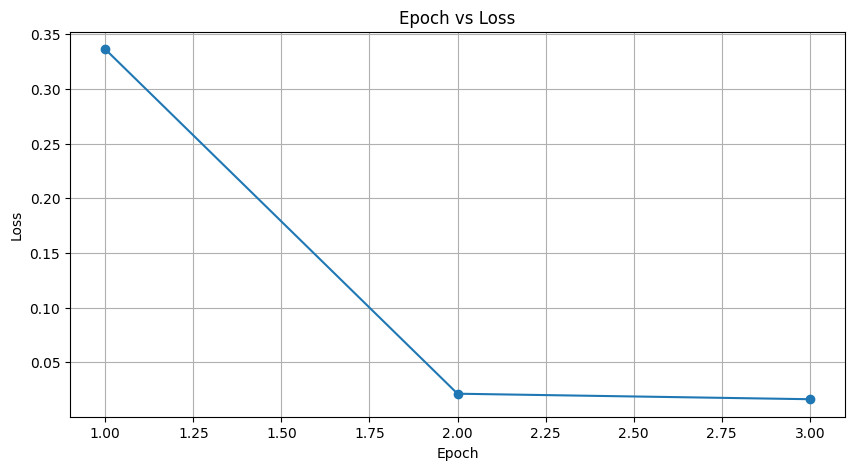

In [ ]:
# Plotting the epoch vs loss graph
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.plot(range(1, 4), epoch_losses, marker='o', linestyle='-')
plt.title('Epoch vs Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.show()
# Evaluation block
all_preds = []
all_true = []

In [ ]:
# Evaluation block
all_preds = []
all_true = []

model.eval()
with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = model(inputs)
        preds = torch.argmax(outputs, dim=1)
        all_preds.extend(preds.cpu().numpy())
        all_true.extend(labels.cpu().numpy())

# Calculate and print metrics
accuracy = accuracy_score(all_true, all_preds)
precision = precision_score(all_true, all_preds, average='macro')
recall = recall_score(all_true, all_preds, average='macro')
f1 = f1_score(all_true, all_preds, average='macro')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(classification_report(all_true, all_preds, target_names=mlb.classes_))

Accuracy: 0.7190
Precision: 0.8829
Recall: 0.9726
F1 Score: 0.9243
              precision    recall  f1-score   support

        B-AC       0.90      0.98      0.94       131
        B-LF       0.86      0.96      0.90       113
         B-O       1.00      1.00      1.00       153
        I-LF       0.77      0.95      0.85       100

   micro avg       0.89      0.98      0.93       497
   macro avg       0.88      0.97      0.92       497
weighted avg       0.90      0.98      0.93       497
 samples avg       0.89      0.98      0.91       497



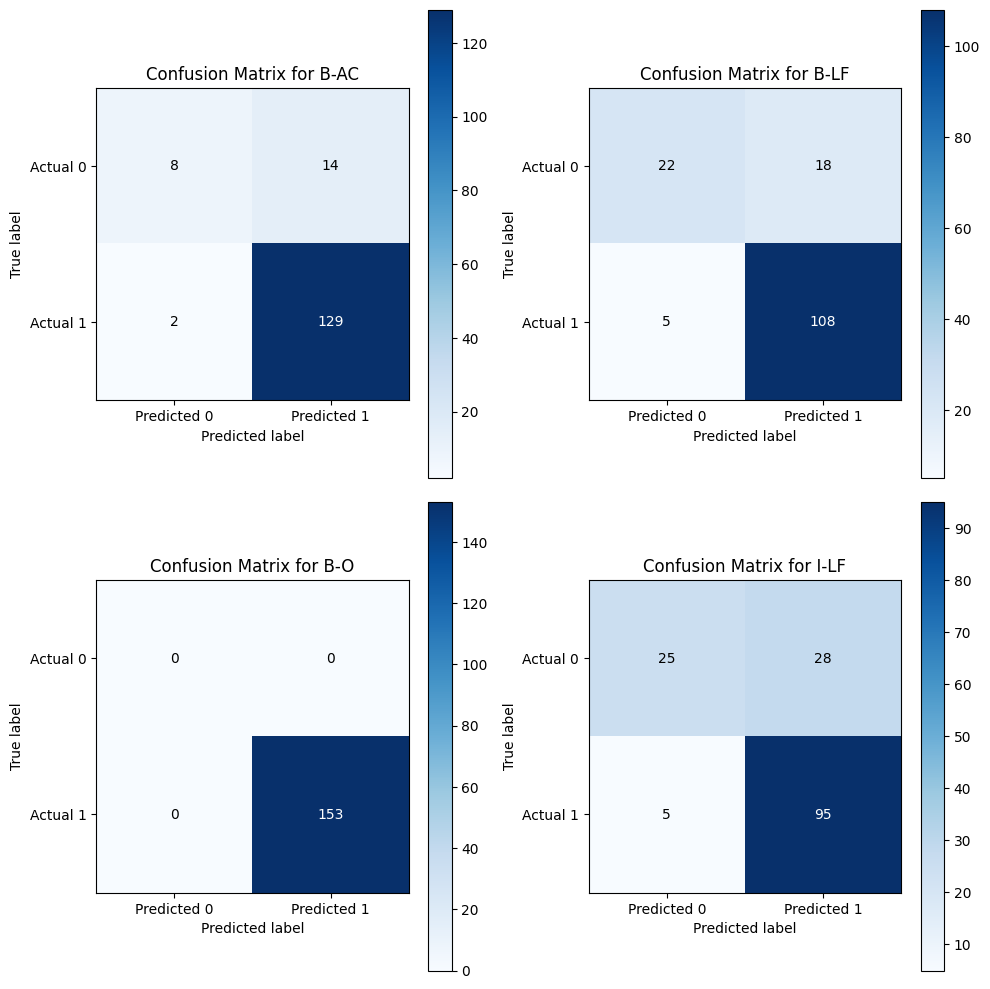

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import multilabel_confusion_matrix
import numpy as np



conf_matrices = multilabel_confusion_matrix(all_true, all_preds)

def plot_confusion_matrices(confusion_matrices, classes):
    fig, axes = plt.subplots(nrows=int(len(classes) / 2), ncols=2, figsize=(10, 5 * int(len(classes) / 2)))
    axes = axes.flatten()  # Flatten if you have more than two subplots

    for i, matrix in enumerate(confusion_matrices):
        ax = axes[i]
        im = ax.imshow(matrix, interpolation='nearest', cmap=plt.cm.Blues)
        ax.figure.colorbar(im, ax=ax)
        ax.set(xticks=np.arange(matrix.shape[1]),
               yticks=np.arange(matrix.shape[0]),
               xticklabels=['Predicted 0', 'Predicted 1'],
               yticklabels=['Actual 0', 'Actual 1'],
               title=f'Confusion Matrix for {classes[i]}',
               ylabel='True label',
               xlabel='Predicted label')

        # Loop over data dimensions and create text annotations.
        thresh = matrix.max() / 2.
        for x in range(matrix.shape[0]):
            for y in range(matrix.shape[1]):
                ax.text(y, x, format(matrix[x, y], 'd'),
                        ha="center", va="center",
                        color="white" if matrix[x, y] > thresh else "black")

    fig.tight_layout()
    plt.show()

plot_confusion_matrices(conf_matrices, mlb.classes_)


In [ ]:

def evaluate_model(loader):
    model.eval()
    all_preds = []
    all_true = []
    with torch.no_grad():
        for inputs, labels in loader:
            outputs = model(inputs)
            preds = torch.argmax(outputs, dim=1)
            all_preds.extend(preds.cpu().numpy())
            all_true.extend(labels.cpu().numpy())
    return all_true, all_preds

# Evaluate on test and validation datasets
test_true, test_preds = evaluate_model(test_loader)
val_true, val_preds = evaluate_model(val_loader)

# Calculate performance metrics
test_accuracy = accuracy_score(test_true, test_preds)
val_accuracy = accuracy_score(val_true, val_preds)
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Validation Accuracy: {val_accuracy:.4f}")

Test Accuracy: 0.7190
Validation Accuracy: 0.7143


In [ ]:

import torch
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Determine if CUDA is available and set the device accordingly
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)  # Move the model to the appropriate device

def evaluate(model, data_loader, device):
    model.eval()  # Set the model to evaluation mode
    all_preds = []
    all_true = []
    with torch.no_grad():  # Turn off gradients to speed up this part
        for inputs, labels in data_loader:
            inputs, labels = inputs.to(device), labels.to(device)  # Ensure data and labels are on the right device
            outputs = model(inputs)
            preds = torch.argmax(outputs, dim=1)
            all_preds.extend(preds.cpu().numpy())  # Move predictions to CPU
            all_true.extend(labels.cpu().numpy())  # Move labels to CPU
    return all_true, all_preds

def print_metrics(true, preds, description):
    accuracy = accuracy_score(true, preds)
    precision = precision_score(true, preds, average='macro', zero_division=0)
    recall = recall_score(true, preds, average='macro', zero_division=0)
    f1 = f1_score(true, preds, average='macro', zero_division=0)
    print(f"{description} - Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}")
    print(classification_report(true, preds, target_names=mlb.classes_))

# Evaluate on test data
test_true, test_preds = evaluate(model, test_loader, device)
print_metrics(test_true, test_preds, "Test Data")

# Evaluate on validation data
val_true, val_preds = evaluate(model, val_loader, device)
print_metrics(val_true, val_preds, "Validation Data")

Test Data - Accuracy: 0.7190, Precision: 0.8829, Recall: 0.9726, F1 Score: 0.9243
              precision    recall  f1-score   support

        B-AC       0.90      0.98      0.94       131
        B-LF       0.86      0.96      0.90       113
         B-O       1.00      1.00      1.00       153
        I-LF       0.77      0.95      0.85       100

   micro avg       0.89      0.98      0.93       497
   macro avg       0.88      0.97      0.92       497
weighted avg       0.90      0.98      0.93       497
 samples avg       0.89      0.98      0.91       497

Validation Data - Accuracy: 0.7143, Precision: 0.8983, Recall: 0.9521, F1 Score: 0.9235
              precision    recall  f1-score   support

        B-AC       0.95      0.97      0.96       116
        B-LF       0.86      0.92      0.89       101
         B-O       1.00      1.00      1.00       126
        I-LF       0.78      0.92      0.85        90

   micro avg       0.90      0.96      0.93       433
   macro avg   

In [ ]:
# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # #          ADAM OPTIMISER     # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # #

In [ ]:
from datasets import load_dataset,load_metric
dataset=load_dataset("surrey-nlp/PLOD-CW")
print(type(dataset))

<class 'datasets.dataset_dict.DatasetDict'>


In [ ]:
b=dataset['test']['tokens']
X_test = [' '.join(sublist) for sublist in b]

print(X_test)

['Abbreviations : GEMS , Global Enteric Multicenter Study ; VIP , ventilated improved pit .', 'Fractions from FPLC purification were treated with Laemmli buffer [ 82 ] with 10 mM 1,4 - dithiothreitol ( DTT ) and heated for 5 m at 85 ° C then analyzed on a 4 % to 15 % discontinuous SDS gel with a 6 % stacking gel run at ambient temperature at a constant 100 V. Two epithelial cytokines other than IL33 , IL25 , and thymic stromal lymphopoietin ( TSLP ) are known to activate ILC2 in the lung [ 22,24 ] .', 'We developed a variant of gene set enrichment analysis ( GSEA ) to determine whether a genetic pathway shows evidence for age regulation [ 23 ] .', 'Red represents samples having the normalized pY232 and/or pY291 values in cancer tissues ≥ 1.1 folds of normal tissues ( of which enhanced pY232 and/or pY291 level may be indicative of dominant survival mode of Fas signaling ) ; blue represents samples having both normalized pY232 and pY291 values < 1.1 ( of which pY232 and pY291 levels less

In [ ]:
c=dataset['validation']['tokens']
X_validation = [' '.join(sublist) for sublist in c]

print(X_validation)

['= Manual Ability Classification System ; QUEST = Quest - Quality of upper extremity skills test ; Cont = control ; M = male , F = female , V = verbal , nonV = non - Verbal , |Quad = quadriplegia , Di = Diplegia , Hemi = hemiplegia .', 'Electro - oculography ( EOG ) ( RetiPort32 , Roland Consult , Wiesbaden , Germany ) was performed in all patients according to the guidelines of the International Society for Clinical Electrophysiology of Vision ( ISCEV).[12 ] Arden ratios below 1.8 were rated as pathologic .', 'Soluble N - ethylmaleimide - sensitive factor attachment protein receptor ( SNARE ) proteins , including target- ( t- ) membrane SNAREs ( Syntaxins [ Syn ] ) and synaptosomal - associated proteins of 25 kDa ( SNAP25 ) and vesicle - associated membrane proteins ( VAMPs ) , are the fundamental components of the exocytotic machinery required for the docking and fusion of secretory granules ( SGs ) with the plasma membrane ( PM ) , which have been well studied in neurons [ 1 , 2 ] 

In [ ]:
from sklearn.preprocessing import MultiLabelBinarizer

# Extract the ner_tags column from your training data
train_labels = dataset['train']['ner_tags']
test_labels=dataset['test']['ner_tags']
val_labels=dataset['validation']['ner_tags']

# Create an instance of MultiLabelBinarizer
mlb = MultiLabelBinarizer()

# Fit and transform the list of lists of labels
y_train= mlb.fit_transform(train_labels)
y_test= mlb.transform(test_labels)
y_vals= mlb.transform(val_labels)

In [ ]:

bert_embeddings = TransformerWordEmbeddings('bert-base-uncased')

# Initialize Flair embeddings (forward and backward)
flair_forward = FlairEmbeddings('news-forward-fast')
flair_backward = FlairEmbeddings('news-backward-fast')

# Stack embeddings
stacked_embeddings = StackedEmbeddings([
    bert_embeddings,
    flair_forward,
    flair_backward
])

In [ ]:
import torch
def embed_documents(documents):
    embedded_docs = []
    for doc in documents:
        sentence = Sentence(doc)
        stacked_embeddings.embed(sentence)
        # Collecting embedded vectors
        embedded_docs.append(torch.stack([token.embedding for token in sentence]))
    return embedded_docs


train_embedded = embed_documents(X_train)
test_embedded = embed_documents(X_test)
val_embedded=embed_documents(X_validation)

# Pad sequences for uniform input size
train_padded = pad_sequence(train_embedded, batch_first=True)
test_padded = pad_sequence(test_embedded, batch_first=True)
val_padded=pad_sequence(val_embedded, batch_first=True)

In [ ]:
import torch.nn as nn
 # Define the BiLSTM model
class BiLSTM(nn.Module):
    def __init__(self, embedding_dim, hidden_dim, output_dim):
        super(BiLSTM, self).__init__()
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, bidirectional=True, batch_first=True)
        self.fc = nn.Linear(2 * hidden_dim, output_dim)

    def forward(self, x):
        lstm_out, _ = self.lstm(x)
        out = self.fc(lstm_out)
        return out

Epoch 1: Training Loss = 1.5360271317117355, Validation Loss = 0.3488932400941849
Epoch 2: Training Loss = 0.29935117065906525, Validation Loss = 0.3205382563173771
Epoch 3: Training Loss = 0.2385697058018516, Validation Loss = 0.31464844197034836


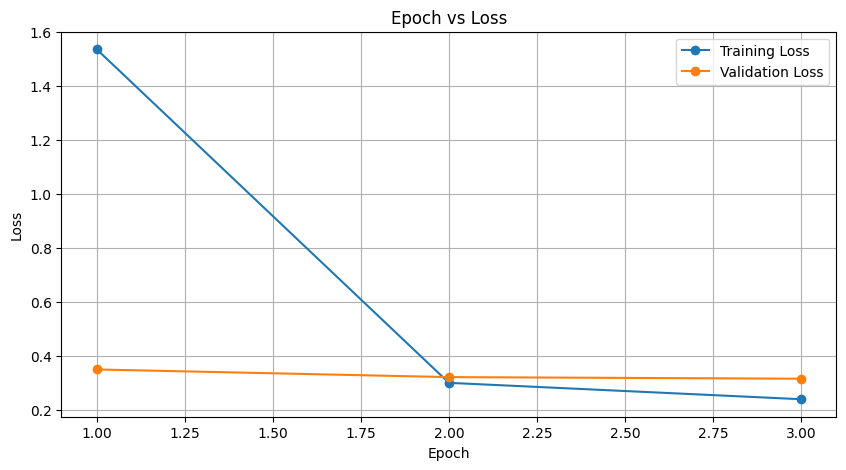

In [ ]:
from torch.utils.data import DataLoader, TensorDataset
import torch.optim as optim


model = BiLSTM(embedding_dim=3072, hidden_dim=256, output_dim=len(mlb.classes_))

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Dataloaders
train_data = TensorDataset(train_padded, torch.tensor(y_train, dtype=torch.long))
test_data = TensorDataset(test_padded, torch.tensor(y_test, dtype=torch.long))
val_data = TensorDataset(val_padded, torch.tensor(y_vals, dtype=torch.long))

train_loader = DataLoader(train_data, batch_size=32, shuffle=True)
test_loader = DataLoader(test_data, batch_size=32, shuffle=False)
val_loader=DataLoader(val_data, batch_size=32, shuffle=False)

training_losses = []
validation_losses = []
model.train()

for epoch in range(3):
    total_train_loss = 0

    # Training loop
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        total_train_loss += loss.item()

    average_train_loss = total_train_loss / len(train_loader)
    training_losses.append(average_train_loss)

    # Validation loop
    model.eval()
    total_val_loss = 0
    with torch.no_grad():
        for inputs, labels in val_loader:
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            total_val_loss += loss.item()

    average_val_loss = total_val_loss / len(val_loader)
    validation_losses.append(average_val_loss)

    model.train()  # Switch back to training mode
    print(f'Epoch {epoch+1}: Training Loss = {average_train_loss}, Validation Loss = {average_val_loss}')

# Plotting the epoch vs loss graph
plt.figure(figsize=(10, 5))
plt.plot(range(1, 4), training_losses, marker='o', linestyle='-', label='Training Loss')
plt.plot(range(1, 4), validation_losses, marker='o', linestyle='-', label='Validation Loss')
plt.title('Epoch vs Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# Evaluation block
all_preds = []
all_true = []

model.eval()
with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = model(inputs)
        preds = torch.argmax(outputs, dim=1)
        all_preds.extend(preds.cpu().numpy())
        all_true.extend(labels.cpu().numpy())

# Calculate and print metrics
accuracy = accuracy_score(all_true, all_preds)
precision = precision_score(all_true, all_preds, average='macro')
recall = recall_score(all_true, all_preds, average='macro')
f1 = f1_score(all_true, all_preds, average='macro')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(classification_report(all_true, all_preds, target_names=mlb.classes_))

Accuracy: 0.7190
Precision: 0.8936
Recall: 0.9644
F1 Score: 0.9265
              precision    recall  f1-score   support

        B-AC       0.93      0.96      0.94       131
        B-LF       0.87      0.96      0.91       113
         B-O       1.00      1.00      1.00       153
        I-LF       0.78      0.94      0.85       100

   micro avg       0.90      0.97      0.93       497
   macro avg       0.89      0.96      0.93       497
weighted avg       0.91      0.97      0.94       497
 samples avg       0.91      0.97      0.91       497



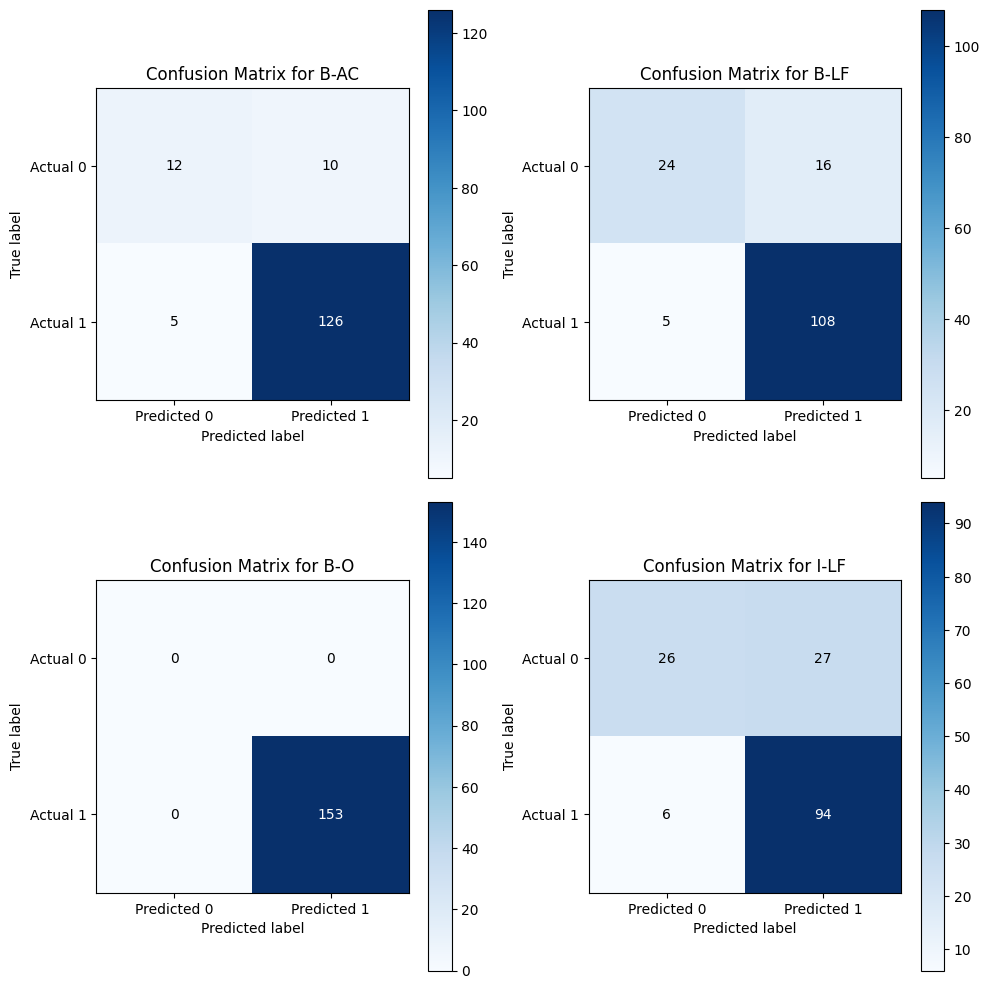

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import multilabel_confusion_matrix
import numpy as np



conf_matrices = multilabel_confusion_matrix(all_true, all_preds)

def plot_confusion_matrices(confusion_matrices, classes):
    fig, axes = plt.subplots(nrows=int(len(classes) / 2), ncols=2, figsize=(10, 5 * int(len(classes) / 2)))
    axes = axes.flatten()  # Flatten if you have more than two subplots

    for i, matrix in enumerate(confusion_matrices):
        ax = axes[i]
        im = ax.imshow(matrix, interpolation='nearest', cmap=plt.cm.Blues)
        ax.figure.colorbar(im, ax=ax)
        ax.set(xticks=np.arange(matrix.shape[1]),
               yticks=np.arange(matrix.shape[0]),
               xticklabels=['Predicted 0', 'Predicted 1'],
               yticklabels=['Actual 0', 'Actual 1'],
               title=f'Confusion Matrix for {classes[i]}',
               ylabel='True label',
               xlabel='Predicted label')

        # Loop over data dimensions and create text annotations.
        thresh = matrix.max() / 2.
        for x in range(matrix.shape[0]):
            for y in range(matrix.shape[1]):
                ax.text(y, x, format(matrix[x, y], 'd'),
                        ha="center", va="center",
                        color="white" if matrix[x, y] > thresh else "black")

    fig.tight_layout()
    plt.show()

plot_confusion_matrices(conf_matrices, mlb.classes_)

In [ ]:
import torch
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Determine if CUDA is available and set the device accordingly
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)  # Move the model to the appropriate device

def evaluate(model, data_loader, device):
    model.eval()  # Set the model to evaluation mode
    all_preds = []
    all_true = []
    with torch.no_grad():  # Turn off gradients to speed up this part
        for inputs, labels in data_loader:
            inputs, labels = inputs.to(device), labels.to(device)  # Ensure data and labels are on the right device
            outputs = model(inputs)
            preds = torch.argmax(outputs, dim=1)
            all_preds.extend(preds.cpu().numpy())  # Move predictions to CPU
            all_true.extend(labels.cpu().numpy())  # Move labels to CPU
    return all_true, all_preds

def print_metrics(true, preds, description):
    accuracy = accuracy_score(true, preds)
    precision = precision_score(true, preds, average='macro', zero_division=0)
    recall = recall_score(true, preds, average='macro', zero_division=0)
    f1 = f1_score(true, preds, average='macro', zero_division=0)
    print(f"{description} - Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}")
    print(classification_report(true, preds, target_names=mlb.classes_))

# Evaluate on test data
test_true, test_preds = evaluate(model, test_loader, device)
print_metrics(test_true, test_preds, "Test Data")

# Evaluate on validation data
val_true, val_preds = evaluate(model, val_loader, device)
print_metrics(val_true, val_preds, "Validation Data")

Test Data - Accuracy: 0.7190, Precision: 0.8936, Recall: 0.9644, F1 Score: 0.9265
              precision    recall  f1-score   support

        B-AC       0.93      0.96      0.94       131
        B-LF       0.87      0.96      0.91       113
         B-O       1.00      1.00      1.00       153
        I-LF       0.78      0.94      0.85       100

   micro avg       0.90      0.97      0.93       497
   macro avg       0.89      0.96      0.93       497
weighted avg       0.91      0.97      0.94       497
 samples avg       0.91      0.97      0.91       497

Validation Data - Accuracy: 0.7302, Precision: 0.8927, Recall: 0.9651, F1 Score: 0.9261
              precision    recall  f1-score   support

        B-AC       0.95      0.97      0.96       116
        B-LF       0.84      0.93      0.88       101
         B-O       1.00      1.00      1.00       126
        I-LF       0.78      0.96      0.86        90

   micro avg       0.90      0.97      0.93       433
   macro avg   

In [ ]:
######################################################################    ADAMAX OPTIMISER     ########################################################################

In [ ]:
import matplotlib.pyplot as plt
import torch
from torch.utils.data import DataLoader, TensorDataset
import torch.optim as optim
import torch.nn as nn



model = BiLSTM(embedding_dim=3072, hidden_dim=256, output_dim=len(mlb.classes_))  # Combining features

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adamax(model.parameters(), lr=0.001)

# Dataloaders
train_data = TensorDataset(train_padded, torch.tensor(y_train, dtype=torch.long))
test_data = TensorDataset(test_padded, torch.tensor(y_test, dtype=torch.long))
val_data = TensorDataset(val_padded, torch.tensor(y_vals, dtype=torch.long))

train_loader = DataLoader(train_data, batch_size=32, shuffle=True)
test_loader = DataLoader(test_data, batch_size=32, shuffle=False)
val_loader=DataLoader(val_data, batch_size=32, shuffle=False)

Epoch 1: Training Loss = 2.0234994134482216, Validation Loss = 0.4456004798412323
Epoch 2: Training Loss = 0.35901857561924877, Validation Loss = 0.3444831892848015
Epoch 3: Training Loss = 0.3027441133471096, Validation Loss = 0.3277929499745369


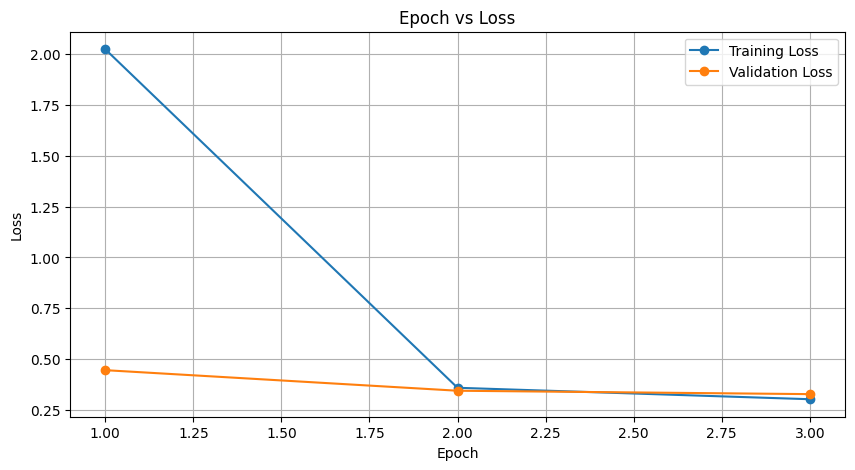

In [ ]:
training_losses = []
validation_losses = []
model.train()

for epoch in range(3):
    total_train_loss = 0

    # Training loop
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        total_train_loss += loss.item()

    average_train_loss = total_train_loss / len(train_loader)
    training_losses.append(average_train_loss)

    # Validation loop
    model.eval()
    total_val_loss = 0
    with torch.no_grad():
        for inputs, labels in val_loader:
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            total_val_loss += loss.item()

    average_val_loss = total_val_loss / len(val_loader)
    validation_losses.append(average_val_loss)

    model.train()  # Switch back to training mode
    print(f'Epoch {epoch+1}: Training Loss = {average_train_loss}, Validation Loss = {average_val_loss}')

# Plotting the epoch vs loss graph
plt.figure(figsize=(10, 5))
plt.plot(range(1, 4), training_losses, marker='o', linestyle='-', label='Training Loss')
plt.plot(range(1, 4), validation_losses, marker='o', linestyle='-', label='Validation Loss')
plt.title('Epoch vs Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Evaluation block
all_preds = []
all_true = []

model.eval()
with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = model(inputs)
        preds = torch.argmax(outputs, dim=1)
        all_preds.extend(preds.cpu().numpy())
        all_true.extend(labels.cpu().numpy())

# Calculate and print metrics
accuracy = accuracy_score(all_true, all_preds)
precision = precision_score(all_true, all_preds, average='macro')
recall = recall_score(all_true, all_preds, average='macro')
f1 = f1_score(all_true, all_preds, average='macro')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(classification_report(all_true, all_preds, target_names=mlb.classes_))

Accuracy: 0.6797
Precision: 0.8541
Recall: 0.9837
F1 Score: 0.9118
              precision    recall  f1-score   support

        B-AC       0.89      0.99      0.94       131
        B-LF       0.80      0.98      0.88       113
         B-O       1.00      1.00      1.00       153
        I-LF       0.72      0.96      0.82       100

   micro avg       0.86      0.99      0.92       497
   macro avg       0.85      0.98      0.91       497
weighted avg       0.87      0.99      0.92       497
 samples avg       0.86      0.99      0.89       497



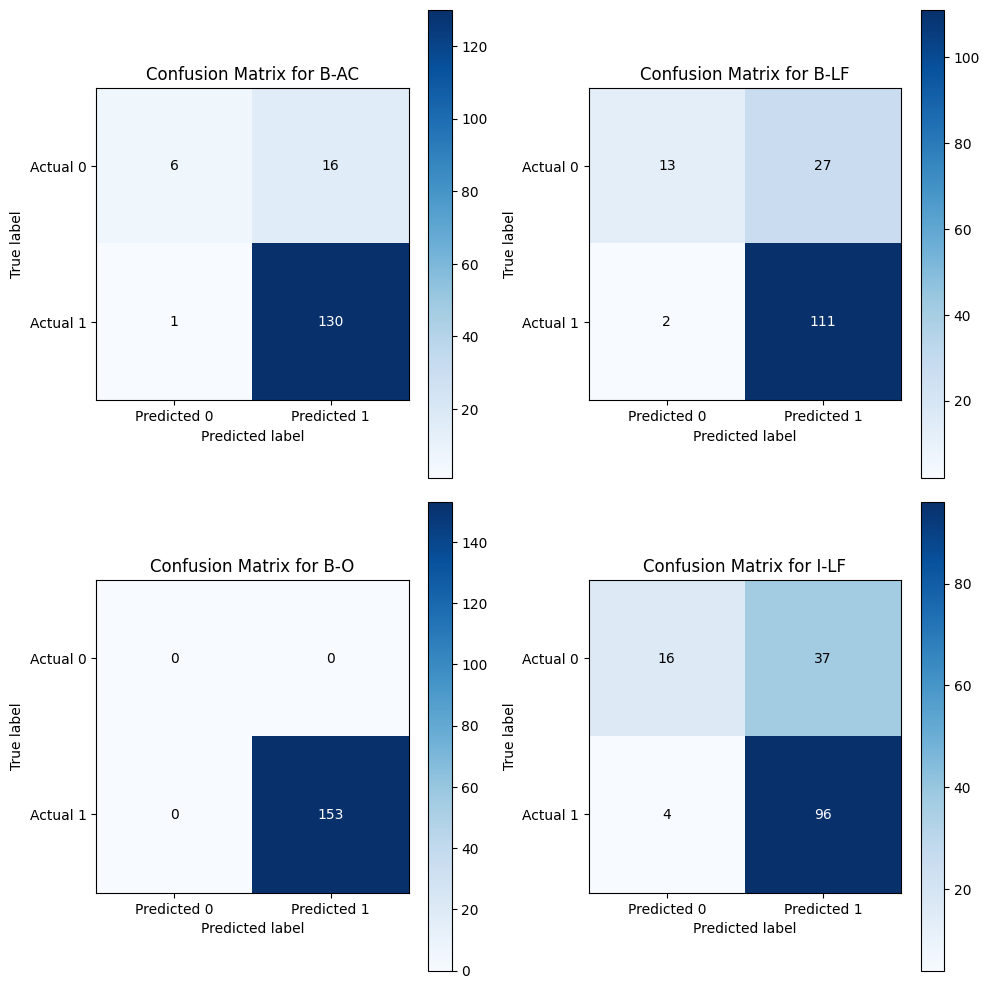

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import multilabel_confusion_matrix
import numpy as np



conf_matrices = multilabel_confusion_matrix(all_true, all_preds)

def plot_confusion_matrices(confusion_matrices, classes):
    fig, axes = plt.subplots(nrows=int(len(classes) / 2), ncols=2, figsize=(10, 5 * int(len(classes) / 2)))
    axes = axes.flatten()  # Flatten if you have more than two subplots

    for i, matrix in enumerate(confusion_matrices):
        ax = axes[i]
        im = ax.imshow(matrix, interpolation='nearest', cmap=plt.cm.Blues)
        ax.figure.colorbar(im, ax=ax)
        ax.set(xticks=np.arange(matrix.shape[1]),
               yticks=np.arange(matrix.shape[0]),
               xticklabels=['Predicted 0', 'Predicted 1'],
               yticklabels=['Actual 0', 'Actual 1'],
               title=f'Confusion Matrix for {classes[i]}',
               ylabel='True label',
               xlabel='Predicted label')

        # Loop over data dimensions and create text annotations.
        thresh = matrix.max() / 2.
        for x in range(matrix.shape[0]):
            for y in range(matrix.shape[1]):
                ax.text(y, x, format(matrix[x, y], 'd'),
                        ha="center", va="center",
                        color="white" if matrix[x, y] > thresh else "black")

    fig.tight_layout()
    plt.show()

plot_confusion_matrices(conf_matrices, mlb.classes_)

In [ ]:
import torch

# Set device to GPU if available, else CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)
model = model.to(device)


# Evaluation block
all_preds = []
all_true = []

def evaluate(model, data_loader):
    model.eval()
    all_preds = []
    all_true = []
    with torch.no_grad():
        for inputs, labels in data_loader:
            inputs = inputs.to(device)  # Make sure data is on the device where the model is
            labels = labels.to(device)
            outputs = model(inputs)
            preds = torch.argmax(outputs, dim=1)
            all_preds.extend(preds.cpu().numpy())
            all_true.extend(labels.cpu().numpy())
    return all_true, all_preds

def print_metrics(true, preds, description):
    accuracy = accuracy_score(true, preds)
    precision = precision_score(true, preds, average='macro', zero_division=0)
    recall = recall_score(true, preds, average='macro', zero_division=0)
    f1 = f1_score(true, preds, average='macro', zero_division=0)
    print(f"{description} - Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}")
    print(classification_report(true, preds, target_names=mlb.classes_))

# Evaluate on test data
test_true, test_preds = evaluate(model, test_loader)
print_metrics(test_true, test_preds, "Test Data")

# Evaluate on validation data
val_true, val_preds = evaluate(model, val_loader)
print_metrics(val_true, val_preds, "Validation Data")

Using device: cpu
Test Data - Accuracy: 0.6797, Precision: 0.8541, Recall: 0.9837, F1 Score: 0.9118
              precision    recall  f1-score   support

        B-AC       0.89      0.99      0.94       131
        B-LF       0.80      0.98      0.88       113
         B-O       1.00      1.00      1.00       153
        I-LF       0.72      0.96      0.82       100

   micro avg       0.86      0.99      0.92       497
   macro avg       0.85      0.98      0.91       497
weighted avg       0.87      0.99      0.92       497
 samples avg       0.86      0.99      0.89       497

Validation Data - Accuracy: 0.6984, Precision: 0.8750, Recall: 0.9694, F1 Score: 0.9180
              precision    recall  f1-score   support

        B-AC       0.93      0.98      0.95       116
        B-LF       0.83      0.95      0.88       101
         B-O       1.00      1.00      1.00       126
        I-LF       0.75      0.94      0.83        90

   micro avg       0.88      0.97      0.92       4

In [ ]:
#############################################################################################################################

In [ ]:
import pandas as pd

# Define the performance metrics for both models
data = {
    'Metrics': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'BERT Focal Loss (Test Data)': [0.7190, 0.8829, 0.9726, 0.9243],
    'BERT Focal Loss (Validation Data)': [0.7143, 0.8983, 0.9521, 0.9235],
    'BERT Categorical Hinge Loss (Test Data)': [0.6993, 0.8713, 0.9809, 0.9210],
    'BERT Categorical Hinge Loss (Validation Data)': [0.7143, 0.8778, 0.9771, 0.9230]
}

# Convert the dictionary into a DataFrame
performance_df = pd.DataFrame(data)

# Display the DataFrame
performance_df

,Metrics,BERT Focal Loss (Test Data),BERT Focal Loss (Validation Data),BERT Categorical Hinge Loss (Test Data),BERT Categorical Hinge Loss (Validation Data)
0,Accuracy,0.7190,0.7143,0.6993,0.7143
1,Precision,0.8829,0.8983,0.8713,0.8778
2,Recall,0.9726,0.9521,0.9809,0.9771
3,F1 Score,0.9243,0.9235,0.9210,0.9230
